# Model Evaluation and Refinement

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of House')

    plt.show()
    plt.close()

In [6]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h1 id="ref1">Part 1: Training and Testing</h1>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y</b>:</p>

In [40]:
y_data = df['price']

In [41]:
x_data=df.drop('price',axis=1)

In [42]:
x_data=x_data.drop(['date','id'],axis=1)

In [43]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 8646
number of training samples: 12967


In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lre=LinearRegression()

In [46]:
lre.fit(x_train[['sqft_living']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
lre.score(x_test[['sqft_living']], y_test)

0.5007810972075581

In [48]:
lre.score(x_train[['sqft_living']], y_train)

0.4861251628076617

we can see the R^2 is much smaller using the test data.

In [49]:
lre.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
lre.score(x_test, y_test)

0.6972653235490809

In [51]:
lre.score(x_train, y_train)

0.7007844595628803

Sometimes you do not have sufficient testing data; as a result, you may want to perform Cross-validation. Let's  go over several methods that you can use for  Cross-validation. 

<h2>Cross-validation Score</h2>

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
Rcross = cross_val_score(lre, x_data[['sqft_living']], y_data, cv=4)

In [54]:
Rcross

array([0.48405393, 0.49342812, 0.4945384 , 0.49661067])

In [55]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.4921577814175951 and the standard deviation is 0.004816164814374235


In [56]:
Rcross = cross_val_score(lre, x_data, y_data, cv=4)

In [57]:
Rcross

array([0.6914582 , 0.69177101, 0.70441861, 0.69014378])

In [58]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.6944479004049531 and the standard deviation is 0.005788880673222384


In [59]:
-1 * cross_val_score(lre,x_data[['sqft_living']], y_data,cv=4,scoring='neg_mean_squared_error')

array([7.40300278e+10, 6.78275022e+10, 6.31573009e+10, 6.85353219e+10])

In [60]:
from sklearn.model_selection import cross_val_predict

In [61]:
yhat = cross_val_predict(lre,x_data[['sqft_living']], y_data,cv=4)
yhat[0:5]

array([289097.80337707, 676049.91415716, 174960.84983762, 506236.39791554,
       428289.2101325 ])

In [62]:
yhat = cross_val_predict(lre,x_data, y_data,cv=4)
yhat[0:5]

array([207458.14206739, 735272.82909112, 377528.96005425, 465545.28129522,
       441378.93746796])

<h1 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h1>

<p>It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world.  One reason for this is overfitting; let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>

In [67]:
lr = LinearRegression()
lr.fit(x_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
yhat_train = lr.predict(x_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']])
yhat_train[0:5]

array([677253.73860166, 969266.1096923 , 380080.93730609, 512680.39517921,
       334314.64593479])

In [69]:
yhat_test = lr.predict(x_test[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']])
yhat_test[0:5]

array([728410.63668225, 425099.88695749, 640764.75122244, 567766.18974903,
       356372.46313515])

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


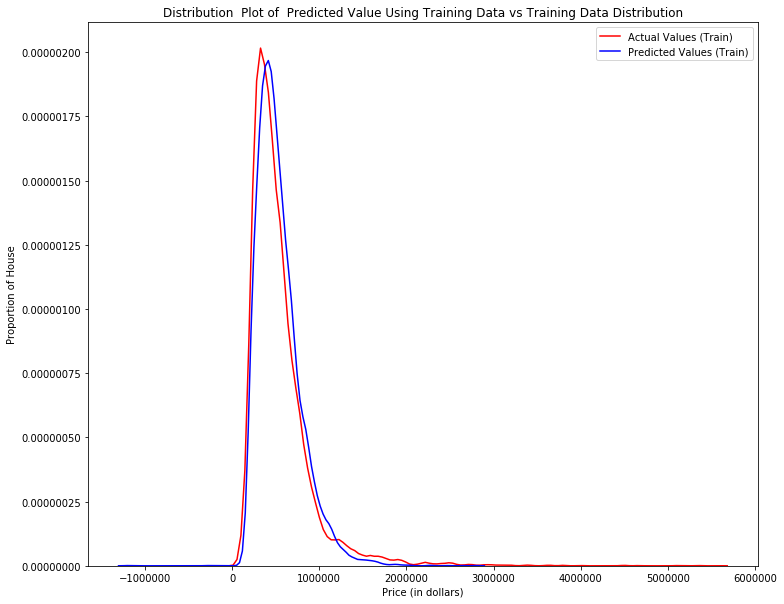

In [71]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

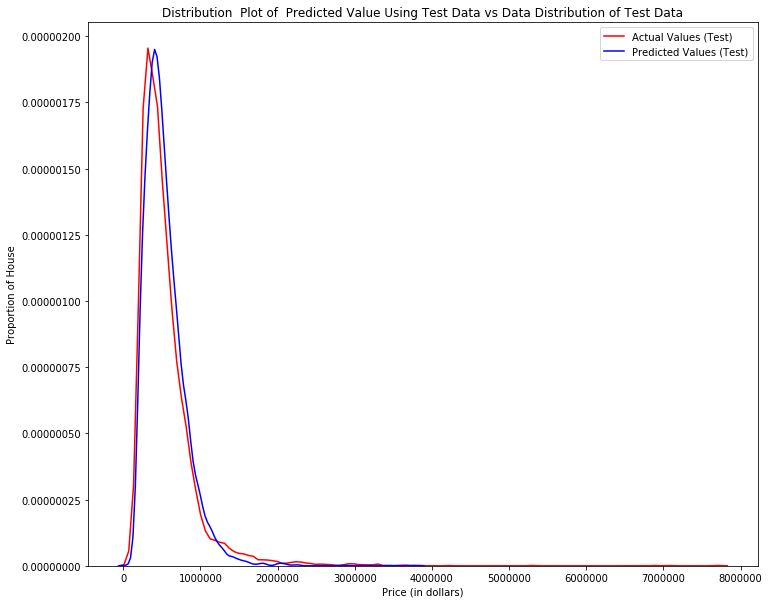

In [72]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [73]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [75]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['sqft_living']])
x_test_pr = pr.fit_transform(x_test[['sqft_living']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [76]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 379585.95141232, 1407637.51236183,  381074.34955339,
        339756.75786053,  799497.20855719])

In [78]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 379585.95141232 1407637.51236183  381074.34955339  339756.75786053]
True values: [ 297000. 1578000.  562100.  631500.]


In [80]:
poly.score(x_train_pr, y_train)

0.5321847634545679

In [81]:
poly.score(x_test_pr, y_test)

0.5491450913206426

Text(3, 0.75, 'Maximum R^2 ')

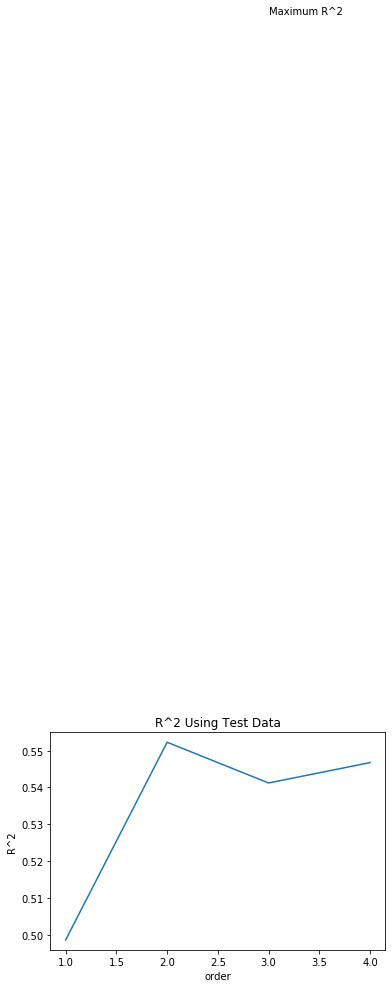

In [82]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['sqft_living']])
    
    x_test_pr = pr.fit_transform(x_test[['sqft_living']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ') 

In [83]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['sqft_living']])
    x_test_pr = pr.fit_transform(x_test[['sqft_living']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['sqft_living']], x_test[['sqft_living']], y_train,y_test, poly, pr)

In [85]:
#interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

<h2 id="ref3">Part 3: Ridge regression</h2> 

In this section, we will review Ridge Regression we will see how the parameter Alfa changes the model. Just a note here our test data will be used as validation data.

In [96]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','grade','sqft_above','sqft_basement']])
x_test_pr=pr.fit_transform(x_test[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','grade','sqft_above','sqft_basement']])

In [97]:
from sklearn.linear_model import Ridge

In [98]:
RigeModel=Ridge(alpha=0.1)

In [99]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [100]:
yhat = RigeModel.predict(x_test_pr)

In [101]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 362558.57642918 1638005.69337909  440573.16111605  427680.85039561]
test set : [ 297000. 1578000.  562100.  631500.]


In [105]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.128249e-24
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.153794e-24
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.772541e-24
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guara

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.819051e-23
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.664206e-23
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.781485e-23
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guara

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.091994e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.033750e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.189509e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guara

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.748071e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.782988e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.826933e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guara

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.960465e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.234095e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.239387e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guara

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.781249e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.778346e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.756801e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guara

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.148618e-23
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.681046e-23
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.185687e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guara

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.596393e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.619880e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.674902e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guara

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.295210e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.041097e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.096005e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guara

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.478081e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.482898e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.465986e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guara

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.825327e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.881234e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.865200e-22
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guara

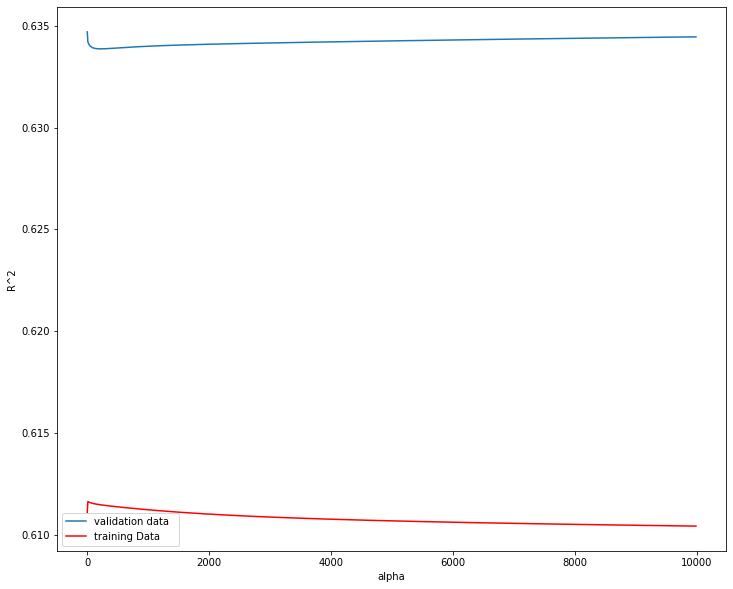

In [106]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [107]:

RigeModel = Ridge(alpha=0) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.6347099501853826

<h2 id="ref4">Part 4: Grid Search</h2>

The term Alfa is a hyperparameter, sklearn has the class  <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [110]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [111]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [112]:
Grid1.fit(x_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','grade','sqft_above','sqft_basement']], y_data)

/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.817573e-17
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.673261e-17
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.416852e-17
  overwrite_a=True).T
/Users/manjunathvhatkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guara

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [113]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [114]:
BestRR.score(x_test[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','grade','sqft_above','sqft_basement']], y_test)

0.5585459666357693

<h1>Thank you for completing this notebook!</h1>